In [1]:
pip install GraphViz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [4]:
hs = pd.read_csv("../Data/SpeedD.csv")
hs2 = hs.drop(['career'], axis = 1)

hs2.head()

,gender,age,income,goal,dec,attr,sinc,intel,fun
0,0,21,69487,2,1,6,9,7,7
1,0,21,69487,2,1,7,8,7,8
2,0,21,69487,2,1,5,8,9,8
3,0,21,69487,2,1,7,6,8,7
4,0,21,69487,2,1,5,6,7,7


In [5]:
hs2.dec.unique()

array([1, 0], dtype=int64)

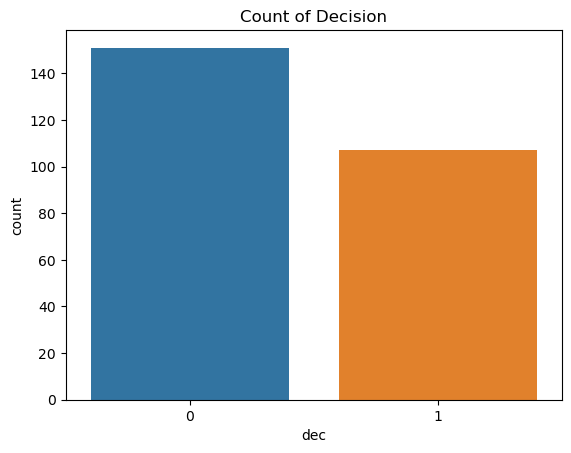

In [6]:
import seaborn as sns
sns.countplot(data=hs2, x='dec')
plt.title('Count of Decision')
plt.show()

In [7]:
print(hs2.groupby('dec').size())

dec
0    151
1    107
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hs2.loc[:,hs2.columns != 'dec'], hs2['dec'],
stratify=hs2['dec'], random_state=66)

In [9]:
hs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  258 non-null    int64
 1   age     258 non-null    int64
 2   income  258 non-null    int64
 3   goal    258 non-null    int64
 4   dec     258 non-null    int64
 5   attr    258 non-null    int64
 6   sinc    258 non-null    int64
 7   intel   258 non-null    int64
 8   fun     258 non-null    int64
dtypes: int64(9)
memory usage: 18.3 KB


In [10]:
features = ['gender', 'age', 'income', 'goal', 'attr', 'sinc', 'intel','fun']
X = hs2[features] #input
y = hs2['dec'] #target

print(X)
print(y)

     gender  age  income  goal  attr  sinc  intel  fun
0         0   21   69487     2     6     9      7    7
1         0   21   69487     2     7     8      7    8
2         0   21   69487     2     5     8      9    8
3         0   21   69487     2     7     6      8    7
4         0   21   69487     2     5     6      7    7
..      ...  ...     ...   ...   ...   ...    ...  ...
253       1   24   16767     1     7     7      7    7
254       1   24   16767     1     3     7      7    4
255       1   24   16767     1     7     9      8   10
256       1   24   16767     1     4     8      8    2
257       1   24   16767     1     5     8      8    7

[258 rows x 8 columns]
0      1
1      1
2      1
3      1
4      1
      ..
253    1
254    0
255    1
256    0
257    0
Name: dec, Length: 258, dtype: int64


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.723


In [12]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.662


In [13]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.01628975 0.13263951 0.10079036 0.0051149  0.51394293 0.0624664
 0.07189316 0.096863  ]


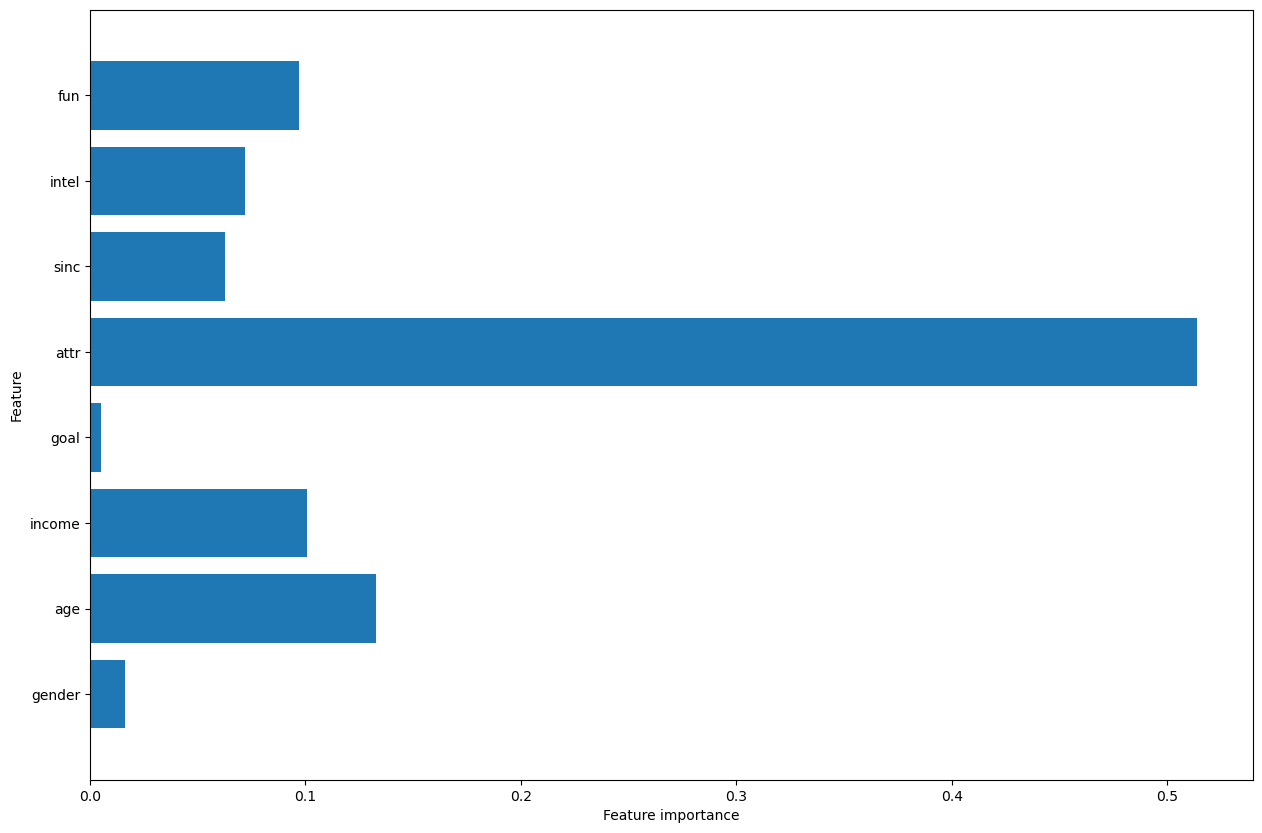

In [14]:
def plot_feature_importances_speeddating(model):
    plt.figure(figsize=(15,10))
    n_features = 8  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_speeddating(tree)

In [15]:
important_features = ['age', 'income', 'sinc', 'goal']
f = hs2[important_features] #input
t = hs2['dec'] #target

print(f)
print(t)

     age  income  sinc  goal
0     21   69487     9     2
1     21   69487     8     2
2     21   69487     8     2
3     21   69487     6     2
4     21   69487     6     2
..   ...     ...   ...   ...
253   24   16767     7     1
254   24   16767     7     1
255   24   16767     9     1
256   24   16767     8     1
257   24   16767     8     1

[258 rows x 4 columns]
0      1
1      1
2      1
3      1
4      1
      ..
253    1
254    0
255    1
256    0
257    0
Name: dec, Length: 258, dtype: int64


In [16]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree2.png')

InvocationException: GraphViz's executables not found